In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('kc_house_data.csv')

In [13]:
X = data['price'].values.reshape(-1, 1)
y = data['sqft_living'].values

In [14]:
X = (X - np.mean(X)) / np.std(X)

In [15]:
X_bias = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X_bias.shape[1])

In [16]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

In [17]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [18]:
learning_rate =[0.01, 0.1,1]
num_iterations = [100,1000,10000]

Final Parameters (Theta): [1318.58916619  408.75875559]
Final Cost: 531533.64321507


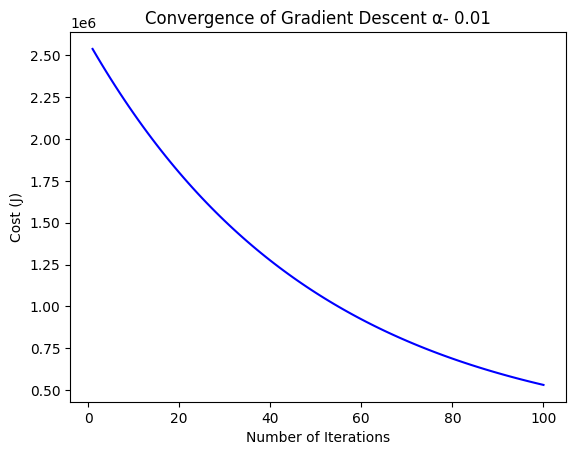

Final Parameters (Theta): [2079.8795148   644.75652011]
Final Cost: 213887.79955715706


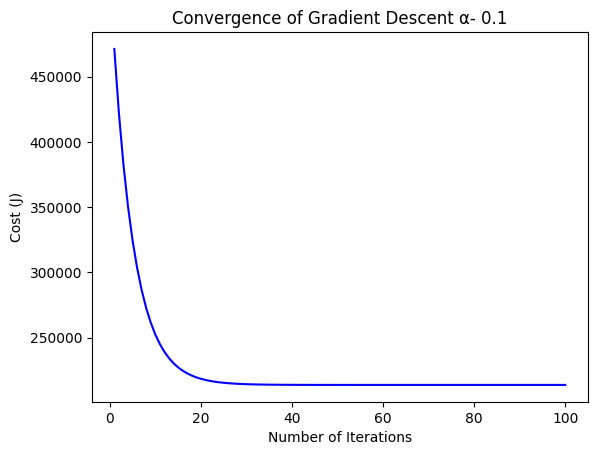

Final Parameters (Theta): [2079.89973627  644.76278871]
Final Cost: 213887.79933305545


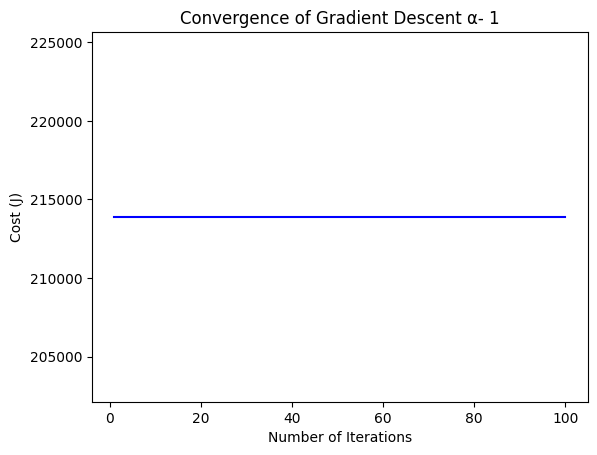

In [19]:
for i in learning_rate:
    theta_final, cost_history = gradient_descent(X_bias, y, theta, i, 100)
    print("Final Parameters (Theta):", theta_final)
    print("Final Cost:", cost_history[-1])
    plt.plot(range(1, len(cost_history) + 1), cost_history, color='blue')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of Gradient Descent α- {i}')
    plt.show()

Final Parameters (Theta): [2079.89973627  644.76278871]
Final Cost: 213887.79933305545


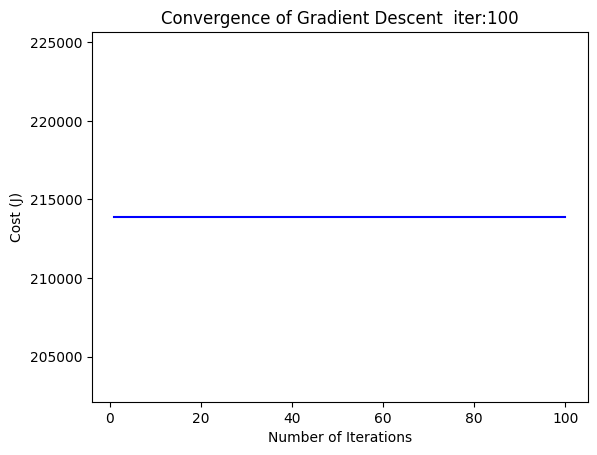

Final Parameters (Theta): [2079.89973627  644.76278871]
Final Cost: 213887.79933305545


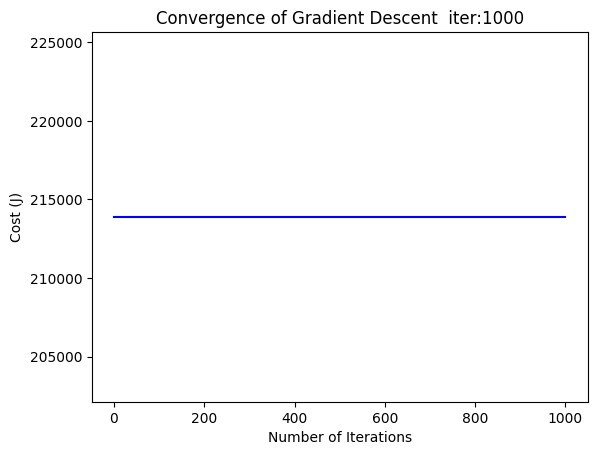

Final Parameters (Theta): [2079.89973627  644.76278871]
Final Cost: 213887.79933305545


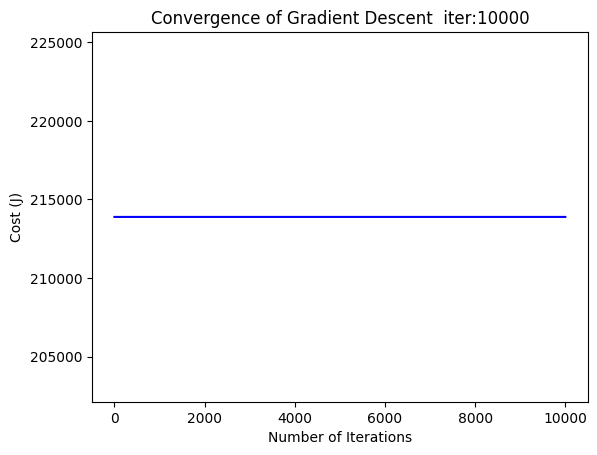

In [20]:
for i in num_iterations:
    theta_final, cost_history = gradient_descent(X_bias, y, theta, 0.01, i)
    print("Final Parameters (Theta):", theta_final)
    print("Final Cost:", cost_history[-1])
    plt.plot(range(1, i + 1), cost_history, color='blue')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of Gradient Descent  iter:{i}')
    plt.show()